In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Let's use the same function used in the
$$ Y  = 2 + 3X + \epsilon $$

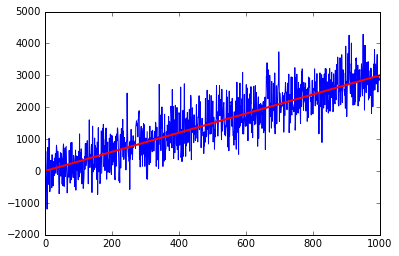

In [25]:
import random as rnd

def truth_f(x):
    return 2 + 3*x

# Generate a real population using the truth f(x) and adding gaussian noise
population = [(x, truth_f(x) + rnd.gauss(0,500)) for x in range(1000)]
p_x, p_y = zip(*population)
truth_y = [truth_f(x_i) for x_i in p_x]

# Convert to numpy arrays
X_population = np.array(p_x)[:, np.newaxis]
y_population = np.array(p_y)

plt.plot(p_y)
plt.plot(truth_y, 'r', linewidth=2.0)
plt.show()

This regression line is characterized by $\beta_0$ and $\beta_1$. We will try to estimate these parameters, namely $\hat\beta_0$ and $\hat\beta_1$ based on some observation of the population

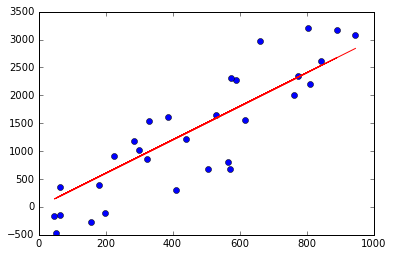

In [26]:
# We take a sample from the population
sample = rnd.sample(population, 30)
x, y = zip(*sample)
plt.plot(x, y, 'o')
plt.plot(x, [truth_f(x_i) for x_i in x], 'r')

Every time we take a new sample, the coefficients of the linear regression change. Can we be sure that these coefficients, based on a sample, are good estimators of the true coefficients?

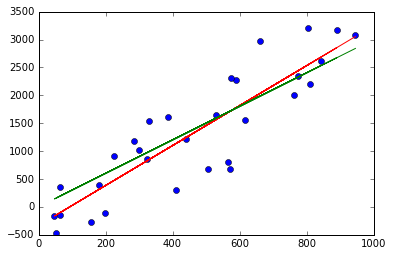

In [27]:
import numpy as np
from sklearn import linear_model

def unzip(sample):
    x_sample, y_sample = zip(*sample)
    return (np.array(x_sample)[:, np.newaxis], np.array(y_sample))

def linear_regression(X_train, y_train):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    return regr

X_sample, y_sample = unzip(sample)
regr = linear_regression(X_sample, y_sample)
prediction = regr.predict(X_sample)

plt.plot(x, y, 'o')
plt.plot(x, prediction, 'r')
plt.plot(x, [truth_f(x_i) for x_i in x], 'g')

Now, we repeat the experiment, taking different samples

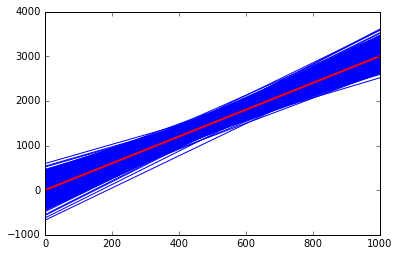

average intercept: -2.179198251180437, average slope: 3.0307740867675146


In [28]:
beta_0 = []
beta_1 = []
for _ in range(1000):
    X_s, y_s = unzip(rnd.sample(population, 30))
    r = linear_regression(X_s, y_s)
    beta_0.append(r.intercept_)
    beta_1.append(r.coef_[0])
    prediction = r.predict(X_population)
    plt.plot(X_population, prediction, 'b')

avg_beta_0 = np.mean(np.array(beta_0))
avg_beta_1 = np.mean(np.array(beta_1))


plt.plot(truth_y, 'r', linewidth=2.0)
#plt.plot([avg_beta_0 + x*avg_beta_1 for x in range(len(population))], 'gx', linewidth=1.0)
plt.show()

print("average intercept: {}, average slope: {}".format(avg_beta_0, avg_beta_1))


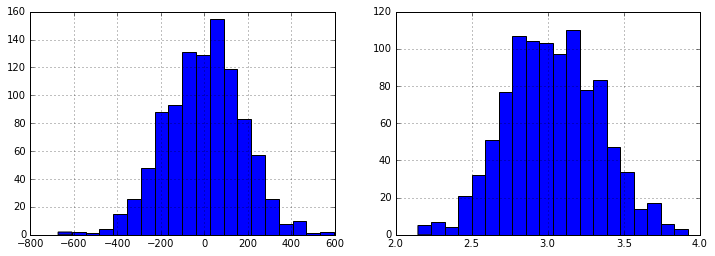

In [29]:
fig = plt.figure(figsize=[12, 4])
fig.add_subplot(121)
plt.grid(True)
plt.hist(beta_0, bins=20)
fig.add_subplot(122)
plt.grid(True)
plt.hist(beta_1, bins=20)
plt.show()